# Tensorflow Project : Bank Note Authentication

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

## 1. Get the Data

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('bank_note_data.csv')

In [5]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
# We have to predict two values
data.Class.value_counts()

0    762
1    610
Name: Class, dtype: int64

* **Class 0 indicates bank note was not authentic.**
* **Class 1 indicates bank note was authentic.**

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Image.Var     1372 non-null float64
Image.Skew    1372 non-null float64
Image.Curt    1372 non-null float64
Entropy       1372 non-null float64
Class         1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


## 2. Explotary Data Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Creating a Countplot of the Classes (Authentic 1 vs Fake 0)**

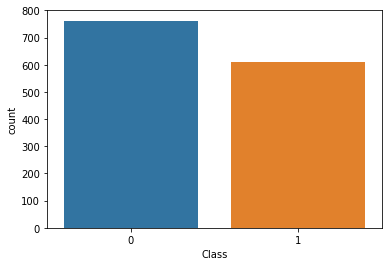

In [9]:
sns.countplot(x='Class',data = data)

**Creating a PairPlot of the Data with Seaborn, setting Hue to Class**

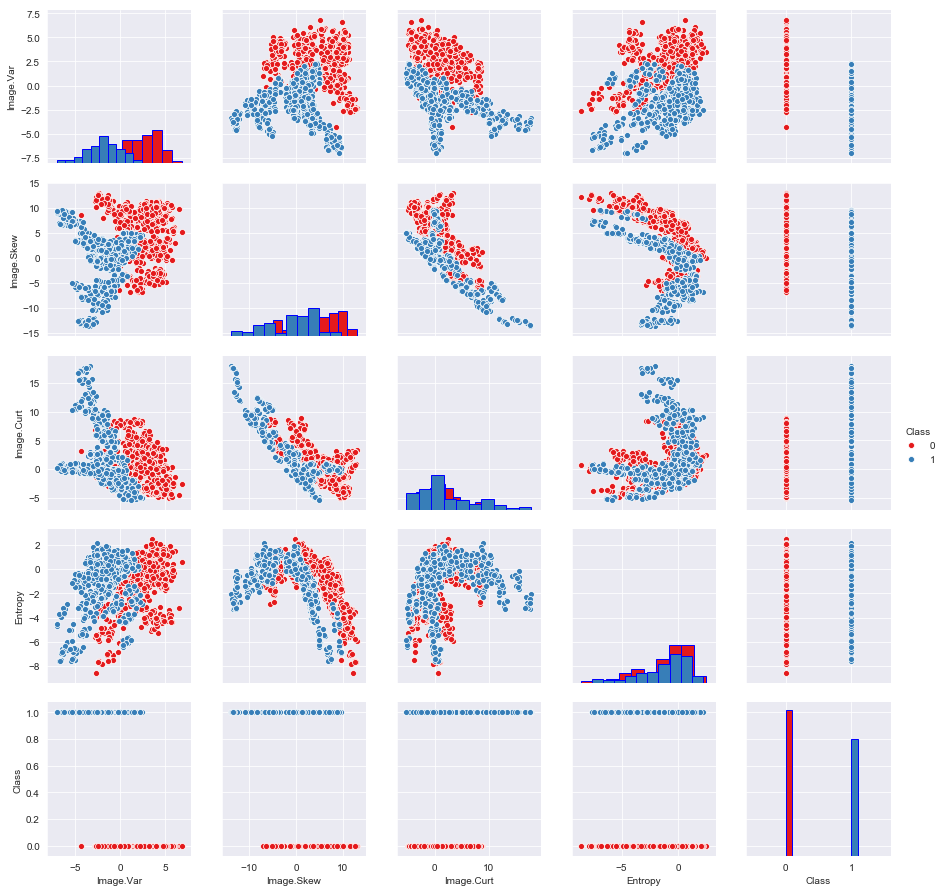

In [18]:
sns.set_style('darkgrid')
sns.pairplot(data,hue='Class',diag_kind='hist',palette='Set1',diag_kws=dict(edgecolor="b", linewidth=1))

## 3. Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data.

### Standard Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

**Creating a StandardScaler() object called scaler.**

In [21]:
scalar = StandardScaler()

**Fit scaler to the features.**

In [22]:
scalar.fit(data.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
scaled_ver = scalar.transform(data.drop('Class',axis = 1))

**Convert the scaled features to a dataframe and check the head of this dataframe.**

In [24]:
scald_data = pd.DataFrame(scaled_ver,columns=data.columns[:-1])
scald_data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## 4. Train Test Split

**Create two objects X and y which are the scaled feature values and labels respectively.**

In [31]:
X = scald_data
y = data['Class']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 5. Create the feature column of the Estimator

In [35]:
import tensorflow as tf

In [37]:
feat_cols = [tf.feature_column.numeric_column(cols) for cols in X.columns]
feat_cols

[_NumericColumn(key='Image.Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Image.Skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Image.Curt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

## 6. Create Input Estimator Function

In [144]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=20,num_epochs=1,shuffle=False)

* **Creating the Classifier object**

In [145]:
 classifier = tf.estimator.DNNClassifier(hidden_units=[10,20,10,10,10],n_classes=2,feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Mir\\AppData\\Local\\Temp\\tmpswc3q6n4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001D60A9FD518>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


* **Train the Classifier with test data**

In [146]:
classifier.train(input_fn=input_func,steps=500)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Mir\AppData\Local\Temp\tmpswc3q6n4\model.ckpt.
INFO:tensorflow:loss = 15.02219, step = 1
INFO:tensorflow:Saving checkpoints for 48 into C:\Users\Mir\AppData\Local\Temp\tmpswc3q6n4\model.ckpt.
INFO:tensorflow:Loss for final step: 0.8783722.


## 7. Predict With Net Test Input Function (Model Evaluation)

**Use the predict method from the classifier model to create predictions from X_test**

In [147]:
predict_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

predictions = list(classifier.predict(predict_fn))

INFO:tensorflow:Restoring parameters from C:\Users\Mir\AppData\Local\Temp\tmpswc3q6n4\model.ckpt-48


In [148]:
final_predict = [pred['class_ids'][0] for pred in predictions]
final_predict[:5]

[1, 1, 0, 1, 0]

**Creating a classification report and a Confusion Matrix. Does anything stand out to you?**

In [149]:
from sklearn.metrics import classification_report, confusion_matrix

In [150]:
print(confusion_matrix(y_test,final_predict))

[[241   0]
 [  0 171]]


In [151]:
print(classification_report(y_test,final_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00       171

   micro avg       1.00      1.00      1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



* **Our model performance is outstanding. The Prediction is 100 percent correct with 0 error rate**

## 8. Comparison of Model with Random Forest Classifier

**Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rfc = RandomForestClassifier(n_estimators=200)

In [134]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [135]:
pred = rfc.predict(X_test)

In [136]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       241
           1       0.98      1.00      0.99       171

   micro avg       0.99      0.99      0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [137]:
print(confusion_matrix(y_test,pred))

[[238   3]
 [  0 171]]


* **It has also done very well, but not quite as good as the DNN model. Hopefully you have seen the power of DNN!**